# Andes ieee39 vsg

Tips regarding andes:

1. static Gen is for power flow calculation, including 'PV' and 'Slack' <br>
dynamci Gen is for TDS, indlucing 'GENROW' and 'GENCAL'

2. Do not connect VSG to a GENROW <br>
VSG needs to share power from unit static gen


## TODO Debug dynamic parameters
Problem: inner loop gains kpvd are 500, which seems to be too large

do incremental test:

1） remove one GENROU, + disturbance

2） connect one VSG without dynamic response, + disturbance

3） one VSG with dynamic response, + distrubance

4） Four VSG ....


In [27]:
import andes
import os
import pandapower as pp

# andes and pandapower version
print(f'Andes version: {andes.__version__}')
print(f'Pandapower version: {pp.__version__}')

Andes version: 1.7.0.post66.dev0+ge72816a5
Pandapower version: 2.8.0


In [28]:
# Choose case
dir_path = os.path.abspath('..')
case_path = '/VIS_opf/ieee39_vis_base.xlsx'
case = dir_path + case_path

ssa = andes.load(case,
                 setup=True,
                 no_output=True,
                 default_config=False)

In [29]:
# Turn on numba to accelerate TDS
ssa.config.numba

# set PQ constant load
ssa.PQ.config.p2p = 1
ssa.PQ.config.q2q = 1
ssa.PQ.config.p2z = 0
ssa.PQ.config.q2z = 0
ssa.PQ.pq2z = 0

ssa.PFlow.run()

True

GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_2  | 0.042  | 0.036
 GENROU_3  | 0.036  | 0.003
 GENROU_4  | 0.025  | 0.001
 GENROU_5  | 0.050  | 0.001
 GENROU_7  | 0.031  | 0.002
 GENROU_10 | 0.003  | 0.000


Singular matrix. Case is not solvable


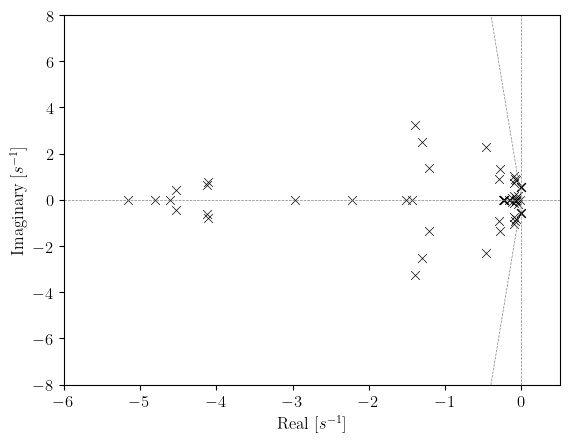

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Real [$s^{-1}$]', ylabel='Imaginary [$s^{-1}$]'>)

In [30]:
ssa.EIG.run()
ssa.EIG.plot()

In [31]:
ssa.TDS.config.tf = 50
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

True

In [32]:
ssa.PQ.set(
            src='Ppf', 
            idx=ssa.PQ.idx.v, 
            attr='v',
            value= 1.08 * ssa.PQ.p0.v
        )

time = 100
ssa.TDS.config.tf = time
ssa.TDS.run()

  0%|          | 0/100 [00:00<?, ?%/s]

True

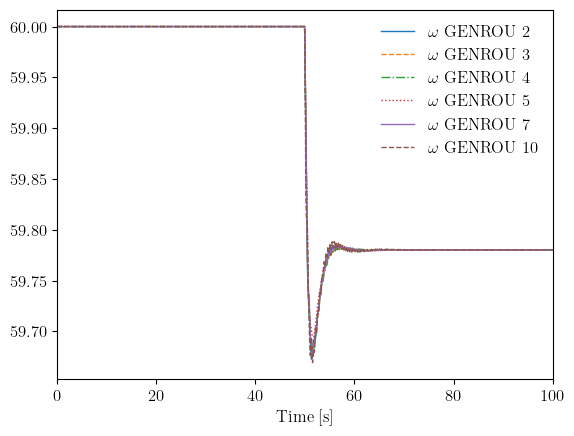

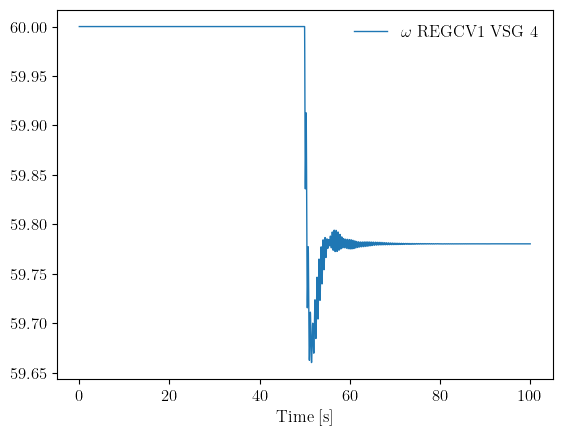

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [33]:
ssa.TDS.plt.plot(ssa.GENROU.omega, ytimes=60)
ssa.TDS.plt.plot(ssa.REGCV1.omega, ytimes=60, a=[3], set_xlim=(49,60))

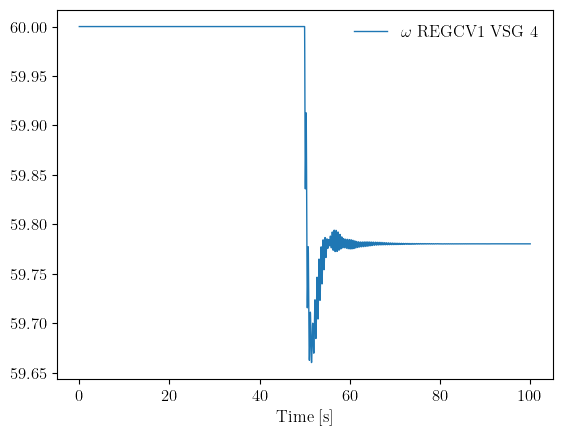

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [34]:
ssa.TDS.plt.plot(ssa.REGCV1.omega, ytimes=60, a=[3], set_xlim=(49,60))



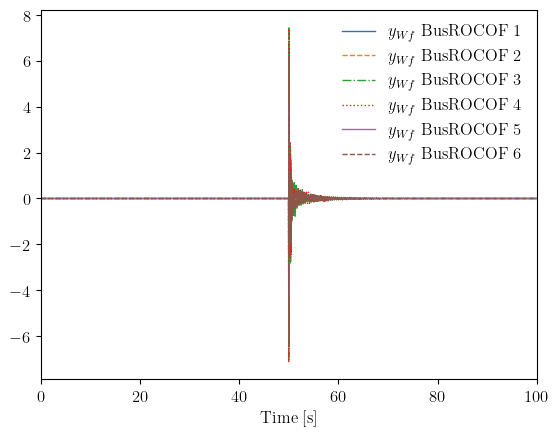

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='Time [s]'>)

In [35]:
ssa.TDS.plt.plot(ssa.BusROCOF.Wf_y, ytimes=60)